<a href="https://colab.research.google.com/github/Ta2002-dot/TomatoLeafDiseaseDetection/blob/main/facerecognition_app.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
print("Rows of the dataset:")
path_df = pd.read_csv("/content/drive/MyDrive/facerecognition/image_paths_labels.csv" , header="infer")
path_df

Rows of the dataset:


image_path   label
0     student-images\face_0\class-faces_face0_aug0.jpg  face_0
1     student-images\face_0\class-faces_face0_aug1.jpg  face_0
2    student-images\face_0\class-faces_face0_aug10.jpg  face_0
3    student-images\face_0\class-faces_face0_aug11.jpg  face_0
4    student-images\face_0\class-faces_face0_aug12.jpg  face_0
..                                                 ...     ...
930   student-images\face_9\class-faces_face9_aug6.jpg  face_9
931   student-images\face_9\class-faces_face9_aug7.jpg  face_9
932   student-images\face_9\class-faces_face9_aug8.jpg  face_9
933   student-images\face_9\class-faces_face9_aug9.jpg  face_9
934  student-images\face_9\class-faces_face9_origin...  face_9

[935 rows x 2 columns]

In [3]:
SPATH = '\content\\drive\\MyDrive\\facerecognition\\'

<>:1: SyntaxWarning: invalid escape sequence '\c'
<>:1: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipython-input-2304195999.py:1: SyntaxWarning: invalid escape sequence '\c'
  SPATH = '\content\\drive\\MyDrive\\facerecognition\\'


In [4]:

print("\nDataset Info:")
path_df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  935 non-null    object
 1   label       935 non-null    object
dtypes: object(2)
memory usage: 14.7+ KB


In [5]:
print("\nMissing values in the dataset:")
path_df.isnull().sum()


Missing values in the dataset:


image_path    0
label         0
dtype: int64

In [6]:
import matplotlib.pyplot as plt
from PIL import Image
def show_image(image_path , title = 'Image Display'):
    img = Image.open(image_path)
    img = img.resize((128, 128))
    img_rgb = img.convert("RGB")
    plt.figure(figsize=(2,2))
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.title(title)
    plt.show()

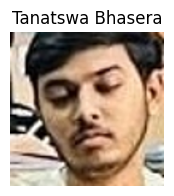

In [7]:
# function for seeing the students data
show_image(r'/content/drive/MyDrive/facerecognition/student-images/face_45/class2faces_face2_original.jpg' , 'Tanatswa Bhasera')

In [8]:
import random

def genran(n, exclude):
    numbers = [x for x in range(54) if x != exclude]
    random_numbers = random.sample(numbers, n)
    return random_numbers

In [9]:

def create_pair(path_df):
    storage = []
    for i in range(0 , 54) :
        df = path_df[path_df['label']==f'face_{i}'].to_dict()
        df = df['image_path']
        original = list(df.values())[-1]

        for augmented in zip(list(df.values())[:-1] , genran(16 , i)):
            img_dict = {}
            img_dict['anchor'] = SPATH + original
            img_dict['positive'] = SPATH + augmented[0]
            img_dict['negative'] = SPATH + list(path_df[path_df['label']==f'face_{augmented[1]}'].to_dict()['image_path'].values())[-1]
            storage.append(img_dict)



    return pd.DataFrame(storage)

In [10]:
pair_df = create_pair(path_df)

In [11]:
pair_df = pair_df.replace(to_replace=r'\\', value='/', regex=True)
pair_df

anchor  \
0    /content/drive/MyDrive/facerecognition/student...   
1    /content/drive/MyDrive/facerecognition/student...   
2    /content/drive/MyDrive/facerecognition/student...   
3    /content/drive/MyDrive/facerecognition/student...   
4    /content/drive/MyDrive/facerecognition/student...   
..                                                 ...   
859  /content/drive/MyDrive/facerecognition/student...   
860  /content/drive/MyDrive/facerecognition/student...   
861  /content/drive/MyDrive/facerecognition/student...   
862  /content/drive/MyDrive/facerecognition/student...   
863  /content/drive/MyDrive/facerecognition/student...   

                                              positive  \
0    /content/drive/MyDrive/facerecognition/student...   
1    /content/drive/MyDrive/facerecognition/student...   
2    /content/drive/MyDrive/facerecognition/student...   
3    /content/drive/MyDrive/facerecognition/student...   
4    /content/drive/MyDrive/facerecognition/student...   
..                                                 ...   
859  /content/drive/MyDrive/facerecognition/student...   
860  /content/drive/MyDrive/facerecognition/student...   
861  /content/drive/MyDrive/facerecognition/student...   
862  /content/drive/MyDrive/facerecognition/student...   
863  /content/drive/MyDrive/facerecognition/student...   

                                              negative  
0    /content/drive/MyDrive/facerecognition/student...  
1    /content/drive/MyDrive/facerecognition/student...  
2    /content/drive/MyDrive/facerecognition/student...  
3    /content/drive/MyDrive/facerecognition/student...  
4    /content/drive/MyDrive/facerecognition/student...  
..                                                 ...  
859  /content/drive/MyDrive/facerecognition/student...  
860  /content/drive/MyDrive/facerecognition/student...  
861  /content/drive/MyDrive/facerecognition/student...  
862  /content/drive/MyDrive/facerecognition/student...  
863  /content/drive/MyDrive/facerecognition/student...  

[864 rows x 3 columns]

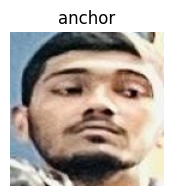

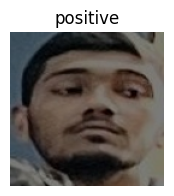

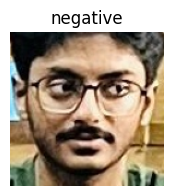

In [12]:
show_image(pair_df['anchor'][401] , 'anchor')
show_image(pair_df['positive'][412] , 'positive')
show_image(pair_df['negative'][401] , 'negative')

In [13]:
import os
import pandas as pd
from PIL import Image
import torch
from torch.utils.data import Dataset
from torchvision import transforms

In [14]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
])

In [15]:
class TripletImageDataset(Dataset):
    def __init__(self, dataframe, transform=None):
        self.dataframe = dataframe
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        # Get paths for anchor, positive, and negative images
        anchor_path = self.dataframe.iloc[idx]['anchor']
        positive_path = self.dataframe.iloc[idx]['positive']
        negative_path = self.dataframe.iloc[idx]['negative']

        # Load images
        anchor = Image.open(anchor_path).convert('RGB')
        positive = Image.open(positive_path).convert('RGB')
        negative = Image.open(negative_path).convert('RGB')

        # Apply transformations if any
        if self.transform:
            anchor = self.transform(anchor)
            positive = self.transform(positive)
            negative = self.transform(negative)

        return anchor, positive, negative

In [16]:
triplet_dataset = TripletImageDataset(dataframe=pair_df, transform=transform)
from torch.utils.data import DataLoader
dataloader = DataLoader(triplet_dataset, batch_size=32, shuffle=True)

In [17]:
pipeline = lambda x : transform(Image.open(x).convert('RGB'))

In [18]:
!pip install facenet-pytorch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 25.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 64.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 78.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.5/755.5 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 101.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 87.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 40.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.

In [18]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [19]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class SiameseNetwork(nn.Module):
    def __init__(self):
        super(SiameseNetwork, self).__init__()
        self.embedding_net = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),  # 3 input channels for RGB
            nn.ReLU(),
            nn.MaxPool2d(2),  # 32 x 112 x 112
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),  # 64 x 56 x 56
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),  # 128 x 28 x 28
            nn.Flatten(),
            nn.Linear(128 * 28 * 28, 512),
            nn.ReLU(),
            nn.Linear(512, 128)
        )

    def forward(self, x):
        embedding = self.embedding_net(x)
        embedding = F.normalize(embedding, p=2, dim=1)
        return embedding


In [20]:
model = SiameseNetwork().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
triplet_loss = nn.TripletMarginLoss(margin=1.0, p=2)


Epoch 1/10: 100%|██████████| 27/27 [13:21<00:00, 29.69s/batch]


Epoch [1/10], Average Loss: 0.3389


Epoch 2/10: 100%|██████████| 27/27 [07:02<00:00, 15.65s/batch]


Epoch [2/10], Average Loss: 0.1027


Epoch 3/10: 100%|██████████| 27/27 [06:55<00:00, 15.40s/batch]


Epoch [3/10], Average Loss: 0.0667


Epoch 4/10: 100%|██████████| 27/27 [06:52<00:00, 15.27s/batch]


Epoch [4/10], Average Loss: 0.0435


Epoch 5/10: 100%|██████████| 27/27 [06:52<00:00, 15.29s/batch]


Epoch [5/10], Average Loss: 0.0315


Epoch 6/10: 100%|██████████| 27/27 [06:50<00:00, 15.21s/batch]


Epoch [6/10], Average Loss: 0.0258


Epoch 7/10: 100%|██████████| 27/27 [06:43<00:00, 14.96s/batch]


Epoch [7/10], Average Loss: 0.0162


Epoch 8/10: 100%|██████████| 27/27 [06:46<00:00, 15.04s/batch]


Epoch [8/10], Average Loss: 0.0116


Epoch 9/10: 100%|██████████| 27/27 [06:52<00:00, 15.26s/batch]


Epoch [9/10], Average Loss: 0.0085


Epoch 10/10: 100%|██████████| 27/27 [06:56<00:00, 15.43s/batch]


Epoch [10/10], Average Loss: 0.0059


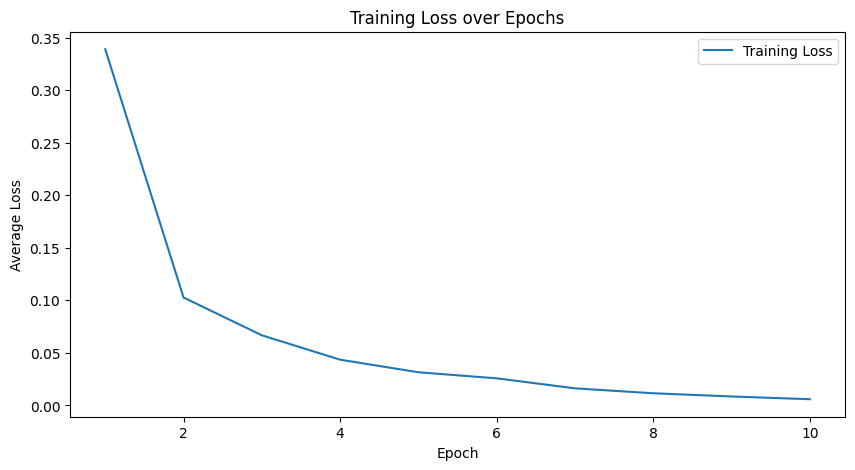

In [22]:
import matplotlib.pyplot as plt
from tqdm import tqdm

num_epochs = 10
loss_history = []  # List to store loss values for plotting

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    # Wrap dataloader with tqdm for progress tracking
    for i, (anchor, positive, negative) in enumerate(tqdm(dataloader, desc=f"Epoch {epoch+1}/{num_epochs}", unit="batch")):
        anchor, positive, negative = anchor.to(device), positive.to(device), negative.to(device)

        optimizer.zero_grad()

        # Get embeddings
        anchor_out = model(anchor)
        positive_out = model(positive)
        negative_out = model(negative)

        # Compute Triplet Loss
        loss = triplet_loss(anchor_out, positive_out, negative_out)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Calculate average loss for the epoch and store it
    average_loss = running_loss / len(dataloader)
    loss_history.append(average_loss)  # Append average loss for this epoch
    print(f"Epoch [{epoch+1}/{num_epochs}], Average Loss: {average_loss:.4f}")

# Plot the training loss after all epochs are done
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), loss_history, label="Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Average Loss")
plt.title("Training Loss over Epochs")
plt.legend()
plt.show()

In [23]:
!pip install torch torchvision torchaudio --upgrade --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 899.7/899.7 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 594.3/594.3 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 111.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.0/88.0 MB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 954.8/954.8 kB 48.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 706.8/706.8 MB 600.4 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.1/193.1 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 54.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.6/63.6 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 267.5/267.5 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.2/288.2 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.3/322.3 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [21]:
model.eval()
SPATH = "/content/drive/MyDrive/facerecognition/"
original_paths_df = path_df[path_df['image_path'].str.contains("original", case=False)].copy()
original_paths_df['image_path'] = original_paths_df['image_path'].apply(lambda x: SPATH + x)
original_paths_df = original_paths_df.replace(to_replace=r'\\', value='/', regex=True)
original_paths_df['face_no'] = original_paths_df['image_path'].str.extract(r'face_(\d+)').astype(int)
original_paths_df['embedding'] = original_paths_df['image_path'].apply(
    lambda path: model(pipeline(path).unsqueeze(0).to(device)).squeeze().tolist()
)
original_paths_df

image_path    label  face_no  \
16   /content/drive/MyDrive/facerecognition/student...   face_0        0   
33   /content/drive/MyDrive/facerecognition/student...   face_1        1   
50   /content/drive/MyDrive/facerecognition/student...  face_10       10   
67   /content/drive/MyDrive/facerecognition/student...  face_11       11   
84   /content/drive/MyDrive/facerecognition/student...  face_12       12   
101  /content/drive/MyDrive/facerecognition/student...  face_13       13   
118  /content/drive/MyDrive/facerecognition/student...  face_14       14   
135  /content/drive/MyDrive/facerecognition/student...  face_15       15   
152  /content/drive/MyDrive/facerecognition/student...  face_16       16   
169  /content/drive/MyDrive/facerecognition/student...  face_17       17   
186  /content/drive/MyDrive/facerecognition/student...  face_18       18   
203  /content/drive/MyDrive/facerecognition/student...  face_19       19   
220  /content/drive/MyDrive/facerecognition/student...   face_2        2   
237  /content/drive/MyDrive/facerecognition/student...  face_20       20   
254  /content/drive/MyDrive/facerecognition/student...  face_21       21   
271  /content/drive/MyDrive/facerecognition/student...  face_22       22   
288  /content/drive/MyDrive/facerecognition/student...  face_23       23   
305  /content/drive/MyDrive/facerecognition/student...  face_24       24   
322  /content/drive/MyDrive/facerecognition/student...  face_25       25   
339  /content/drive/MyDrive/facerecognition/student...  face_26       26   
356  /content/drive/MyDrive/facerecognition/student...  face_27       27   
373  /content/drive/MyDrive/facerecognition/student...  face_28       28   
390  /content/drive/MyDrive/facerecognition/student...  face_29       29   
407  /content/drive/MyDrive/facerecognition/student...   face_3        3   
424  /content/drive/MyDrive/facerecognition/student...  face_30       30   
441  /content/drive/MyDrive/facerecognition/student...  face_31       31   
458  /content/drive/MyDrive/facerecognition/student...  face_32       32   
475  /content/drive/MyDrive/facerecognition/student...  face_33       33   
492  /content/drive/MyDrive/facerecognition/student...  face_34       34   
509  /content/drive/MyDrive/facerecognition/student...  face_35       35   
526  /content/drive/MyDrive/facerecognition/student...  face_36       36   
543  /content/drive/MyDrive/facerecognition/student...  face_37       37   
560  /content/drive/MyDrive/facerecognition/student...  face_38       38   
577  /content/drive/MyDrive/facerecognition/student...  face_39       39   
594  /content/drive/MyDrive/facerecognition/student...   face_4        4   
611  /content/drive/MyDrive/facerecognition/student...  face_40       40   
628  /content/drive/MyDrive/facerecognition/student...  face_41       41   
645  /content/drive/MyDrive/facerecognition/student...  face_42       42   
662  /content/drive/MyDrive/facerecognition/student...  face_43       43   
679  /content/drive/MyDrive/facerecognition/student...  face_44       44   
696  /content/drive/MyDrive/facerecognition/student...  face_45       45   
713  /content/drive/MyDrive/facerecognition/student...  face_46       46   
730  /content/drive/MyDrive/facerecognition/student...  face_47       47   
747  /content/drive/MyDrive/facerecognition/student...  face_48       48   
764  /content/drive/MyDrive/facerecognition/student...  face_49       49   
781  /content/drive/MyDrive/facerecognition/student...   face_5        5   
798  /content/drive/MyDrive/facerecognition/student...  face_50       50   
815  /content/drive/MyDrive/facerecognition/student...  face_51       51   
832  /content/drive/MyDrive/facerecognition/student...  face_52       52   
849  /content/drive/MyDrive/facerecognition/student...  face_53       53   
866  /content/drive/MyDrive/facerecognition/student...  face_54       54   
883  /content/drive/MyDrive/facerecognition/student...   face_6        6   
900  /content/dr

In [22]:
import torch
import torch.nn.functional as F

def most_similar(image, model, pipeline, face_dict, device, threshold=0.3):
    model.eval()
    # Get embedding for the query image
    image_embedding = model(pipeline(image).unsqueeze(0).to(device))

    highest_similarity = -1
    most_similar_face = None

    for face_no, embedding in face_dict.items():
        embedding = torch.tensor(embedding).to(device)
        similarity = F.cosine_similarity(image_embedding, embedding)
        if similarity > highest_similarity:
            highest_similarity = similarity
            most_similar_face = face_no

    if highest_similarity > threshold:
        return most_similar_face, highest_similarity.item()
    else:
        return None, highest_similarity.item()


In [23]:
torch.save(model.state_dict(), 'siamese_model.pth')

In [24]:
path_df['image_path']

0       student-images\face_0\class-faces_face0_aug0.jpg
1       student-images\face_0\class-faces_face0_aug1.jpg
2      student-images\face_0\class-faces_face0_aug10.jpg
3      student-images\face_0\class-faces_face0_aug11.jpg
4      student-images\face_0\class-faces_face0_aug12.jpg
                             ...                        
930     student-images\face_9\class-faces_face9_aug6.jpg
931     student-images\face_9\class-faces_face9_aug7.jpg
932     student-images\face_9\class-faces_face9_aug8.jpg
933     student-images\face_9\class-faces_face9_aug9.jpg
934    student-images\face_9\class-faces_face9_origin...
Name: image_path, Length: 935, dtype: object

In [25]:
original_paths_df.to_csv("embeddings.csv")

In [29]:
# extracting embedding of a person
face_dict = {}
for person in range(0 , original_paths_df.shape[0]) :
    face_dict[person] =  original_paths_df[original_paths_df['face_no']==person]['embedding'].tolist()[0]

In [30]:
import torch
import torch.nn.functional as F

def most_similar(image,threshold=0.3):
    model.eval()
    image_embedding = model(pipeline(image).unsqueeze(0).to(device))
    highest_similarity = -1
    most_similar_face = None
    for face_no, embedding in face_dict.items():
        embedding = torch.tensor(embedding).to(device)
        similarity = F.cosine_similarity(image_embedding, embedding)
        if similarity > highest_similarity:
            highest_similarity = similarity
            most_similar_face = face_no
    if highest_similarity > threshold:
        return most_similar_face
    else:
        return None


In [31]:
most_similar('///content/drive/MyDrive/facerecognition/aagam-shah/aagam-shah/Screenshot 2024-10-26 122941.png')

7

In [32]:
most_similar('//content/drive/MyDrive/facerecognition/class2face/class2face/class-faces.jpg')

3

In [33]:
!pip install mtcnn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 23.1 MB/s eta 0:00:00


In [37]:
import cv2
from mtcnn import MTCNN
import matplotlib.pyplot as plt
from PIL import Image
import torch
import torch.nn.functional as F
import ast


def most_similar2(image, threshold=0.0, device='cpu'):
    model.eval()
    image_embedding = model(transform(image).unsqueeze(0).to(device))

    highest_similarity = -1
    most_similar_face = None

    for face_no, embedding in face_dict.items():
        embedding = torch.tensor(embedding).to(device)

        similarity = F.cosine_similarity(image_embedding, embedding.unsqueeze(0))

        if similarity > highest_similarity:
            highest_similarity = similarity
            most_similar_face = face_no

    if highest_similarity > threshold:
        return most_similar_face, highest_similarity.item()
    else:
        return None, highest_similarity.item()

def detect_faces_mtcnn_image(image_path):
    # Initialize the MTCNN detector
    detector = MTCNN()

    # Read the image
    image = cv2.imread(image_path)

    if image is None:
        print(f"Error: Unable to open image at {image_path}")
        return

    # Convert the image to RGB since MTCNN expects RGB images
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Perform face detection
    faces = detector.detect_faces(rgb_image)

    # Draw bounding boxes around detected faces
    for face in faces:
        x, y, width, height = face['box']

        # Expand dimensions by 0.3%
        expand_factor = 0.3
        new_width = int(width * (1 + expand_factor))
        new_height = int(height * (1 + expand_factor))

        # Calculate new coordinates, ensuring they are within image bounds
        x_new = max(0, x - (new_width - width) // 2)
        y_new = max(0, y - (new_height - height) // 2)

        # Crop the face from the original image using the expanded coordinates
        face_image = image[y_new:y_new + new_height, x_new:x_new + new_width]

        # Convert the cropped face image to a PIL Image
        face_image_pil = Image.fromarray(cv2.cvtColor(face_image, cv2.COLOR_BGR2RGB))

        # Get the most similar face number and confidence using the cropped image
        face_no, confidence = most_similar2(face_image_pil)  # Use most_similar2 here

        # Draw the red bounding box
        cv2.rectangle(image, (x_new, y_new), (x_new + new_width, y_new + new_height), (0, 0, 255), 2)

        # Create the label text
        label = f" {face_no}" if face_no is not None else "Unknown"

        # Put the label on the image
        cv2.putText(image, label, (x_new, y_new - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 4)

    # Convert image to RGB for Matplotlib
    rgb_image_with_boxes = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Display the resulting image using Matplotlib
    plt.figure(figsize=(20, 20))
    plt.imshow(rgb_image_with_boxes)
    plt.axis('off')
    plt.title('Detected Faces')
    plt.show()

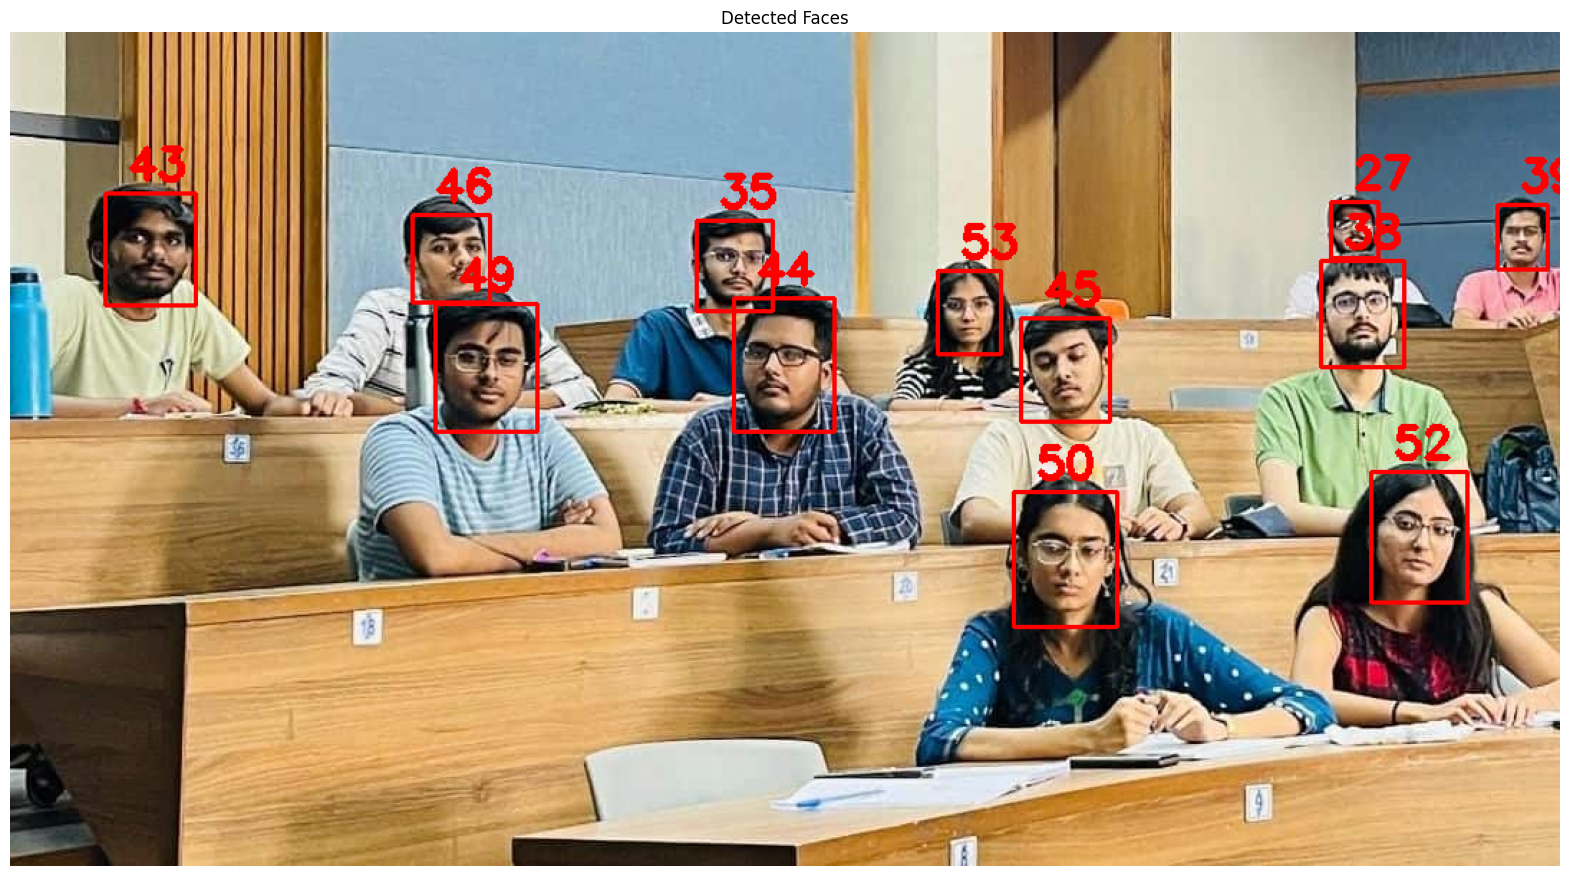

In [38]:
image_path = r"/content/drive/MyDrive/facerecognition/class2face/class2face/class2faces-min.jpg"
detect_faces_mtcnn_image(image_path)

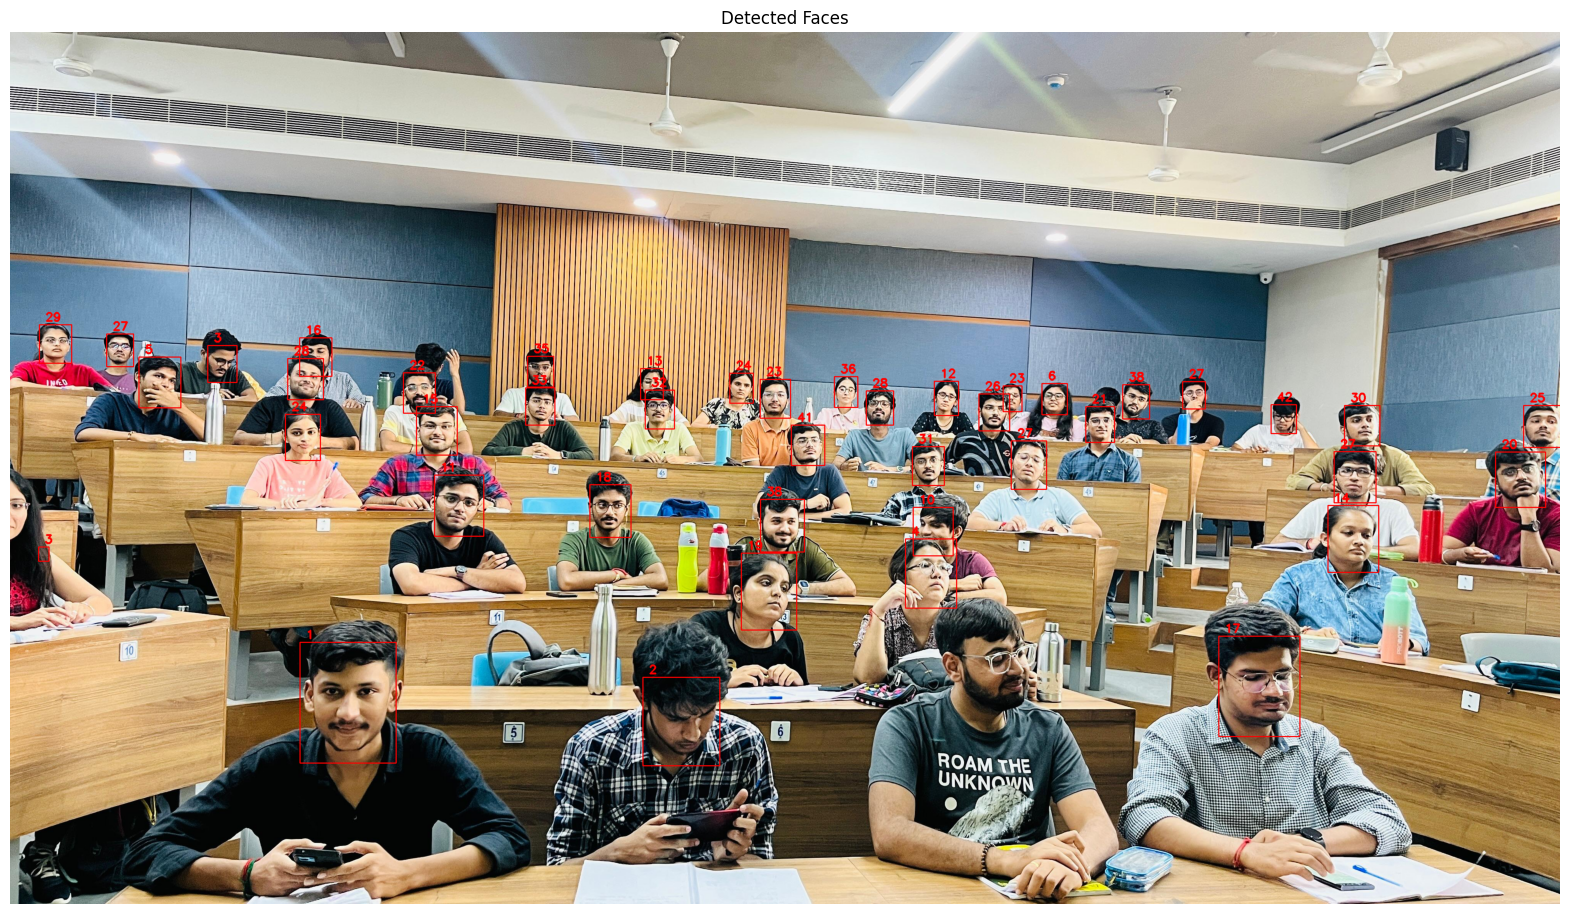

In [39]:
test_image_path = '/content/drive/MyDrive/facerecognition/class2face/class2face/class-faces.jpg'
detect_faces_mtcnn_image(test_image_path)

In [40]:
!pip install Colabcode
!pip install Fastapi

Requested uvicorn==0.13.1 from https://files.pythonhosted.org/packages/ef/67/546c35e9fffb585ea0608ba3bdcafe17ae402e304367203d0b08d6c23051/uvicorn-0.13.1-py3-none-any.whl (from Colabcode) has invalid metadata: .* suffix can only be used with `==` or `!=` operators
    python-dotenv (>=0.13.*) ; extra == 'standard'
                   ~~~~~~~^
Please use pip<24.1 if you need to use this version.
INFO: pip is looking at multiple versions of colabcode to determine which version is compatible with other requirements. This could take a while.
  Using cached uvicorn-0.13.1-py3-none-any.whl.metadata (4.6 kB)
Requested uvicorn==0.13.1 from https://files.pythonhosted.org/packages/ef/67/546c35e9fffb585ea0608ba3bdcafe17ae402e304367203d0b08d6c23051/uvicorn-0.13.1-py3-none-any.whl (from Colabcode) has invalid metadata: .* suffix can only be used with `==` or `!=` operators
    python-dotenv (>=0.13.*) ; extra == 'standard'
                   ~~~~~~~^
Please use pip<24.1 if you need to use this versio

In [41]:
from colabcode import ColabCode
from fastapi import FastAPI

In [44]:
# Save trained model weights
torch.save(model.state_dict(), "/content/drive/MyDrive/facerecognition/siamese_model.pth")

# Save face dictionary embeddings
import pickle
with open("/content/drive/MyDrive/facerecognition/face_dict.pkl", "wb") as f:
    pickle.dump(face_dict, f)


In [43]:
from google.colab import drive
drive.mount('/content/drive')

# Example path to your project folder
project_folder = "/content/drive/MyDrive/facerecognition"
reference_folder = f"{project_folder}/references"  # Folder with reference images


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
pip install fastapi uvicorn torch torchvision mtcnn pillow opencv-python


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 71.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
facenet-pytorch 2.6.0 requires numpy<2.0.0,>=1.24.0, but you have numpy 2.2.6 which is incompatible.
facenet-pytorch 2.6.0 requires torch<2.3.0,>=2.2.0, but you have torch 2.9.0 which is incompatible.
facenet-pytorch 2.6.0 requires torchvision<0.18.0,>=0.17.0, but you have torchvision 0.24.0 which is incompatible.
tensorflow 2.19.0 requires numpy<2.2.0,>=1.26.0, but you have numpy 2.2.6 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.6 which is incompatible.
